# Pandas Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transactions = pd.read_csv("../project_data/project_transactions.csv")
transactions.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           1364  26984896261    1      842930         1         2.19   
1           1364  26984896261    1      897044         1         2.99   
2           1364  26984896261    1      920955         1         3.09   
3           1364  26984896261    1      937406         1         2.50   
4           1364  26984896261    1      981760         1         0.60   

   STORE_ID  RETAIL_DISC  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0     31742         0.00        1          0.0                0.0  
1     31742        -0.40        1          0.0                0.0  
2     31742         0.00        1          0.0                0.0  
3     31742        -0.99        1          0.0                0.0  
4     31742        -0.79        1          0.0                0.0

In [219]:
#Renaming the columns to downcase
transactions.rename(columns = lambda x: x.lower(), inplace= True)

In [220]:
# Take a look at the raw data, the datatypes, 
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int64  
 3   product_id         int64  
 4   quantity           int64  
 5   sales_value        float64
 6   store_id           int64  
 7   retail_disc        float64
 8   week_no            int64  
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [221]:
# Cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype.
transactions = transactions.astype(
    {
        'day':'int8'
        ,'quantity': 'int32'
        ,'store_id':'int32'
        ,'week_no': 'int8'
    }
)

In [222]:
# Check the memory reduction by doing so.
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int8   
 3   product_id         int64  
 4   quantity           int32  
 5   sales_value        float64
 6   store_id           int32  
 7   retail_disc        float64
 8   week_no            int8   
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float64(4), int32(2), int64(3), int8(2)
memory usage: 135.1 MB


### Conclusions:
**By changing data types of some columns and reducing their memory allocation, we notice a reduction of memory usage that has passed from
180.1 MB to 135.1 MB**

In [223]:
# * Is there any missing data?: No
transactions.isna().sum()

household_key        0
basket_id            0
day                  0
product_id           0
quantity             0
sales_value          0
store_id             0
retail_disc          0
week_no              0
coupon_disc          0
coupon_match_disc    0
dtype: int64

**No there is no missing data**

In [224]:
# How many unique households and products are there in the data? The fields household_key and Product_ID will help here.
transactions[['household_key','product_id']].nunique()

household_key     2099
product_id       84138
dtype: int64

**There are 2099 household_key unique values and 84138 product_id unique values**

In [225]:
# another way to check unique values, is checking the duplicates 
(~transactions[['household_key']].duplicated()).sum()

2099

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [226]:
transactions = (
    transactions
    .assign(
        total_discount = transactions['retail_disc'] + transactions['coupon_disc']
        ,percent_discount = lambda x:(x['total_discount']/x['sales_value'])
        .abs()
        .apply(
            lambda y: 1 if y>1 else (0 if y<0 else y) # Note: You cannot directly use if inside a lambda when working with DataFrames.
                                                      #Instead, you should use a vectorized operation like .apply() or NumPy functions.
        )
    )
    .drop(['retail_disc', 'coupon_disc', 'coupon_match_disc'], axis = 1)
)

In [227]:
transactions.head()

household_key    basket_id  day  product_id  quantity  sales_value  \
0           1364  26984896261    1      842930         1         2.19   
1           1364  26984896261    1      897044         1         2.99   
2           1364  26984896261    1      920955         1         3.09   
3           1364  26984896261    1      937406         1         2.50   
4           1364  26984896261    1      981760         1         0.60   

   store_id  week_no  total_discount  percent_discount  
0     31742        1            0.00          0.000000  
1     31742        1           -0.40          0.133779  
2     31742        1            0.00          0.000000  
3     31742        1           -0.99          0.396000  
4     31742        1           -0.79          1.000000

## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [228]:
#The total sales
transactions.sales_value.sum().round(2)

6666243.5

In [229]:
# Total discount
transactions.total_discount.sum().round(2)

-1178658.08

In [230]:
# Overall percentage discount
transactions.total_discount.sum()/transactions.sales_value.sum()

-0.1768099350106248

In [231]:
# Total quantity sold
transactions.quantity.sum().round(2)

216713611

In [232]:
# Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage ?
transactions.quantity.max()

89638

In [233]:
# Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage? yes
transactions.loc[transactions.quantity.argmax(),:]

household_key       6.300000e+02
basket_id           3.474915e+10
day                -9.000000e+00
product_id          6.534178e+06
quantity            8.963800e+04
sales_value         2.500000e+02
store_id            3.840000e+02
week_no             7.300000e+01
total_discount     -1.345000e+01
percent_discount    5.380000e-02
Name: 1442095, dtype: float64

In [234]:
# Total sales value per basket
(transactions.sales_value.sum()/transactions.basket_id.nunique()).round(2)

28.62

In [235]:
# Total sales value per household
(transactions.sales_value.sum()/transactions.household_key.nunique()).round(2)

3175.91

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: ylabel='Frequency'>

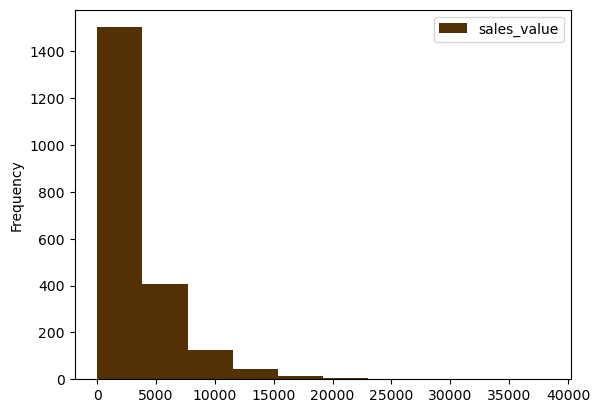

In [236]:
# Plot the distribution of total sales value purchased at the household level.
(
    transactions
    .groupby(['household_key'])
    .agg({'sales_value':'sum'})
    .plot(
        kind= 'hist'
        ,colormap='BrBG'
    )
)


In [127]:
# What were the top 10 households by quantity purchased ?
(
    transactions
    .groupby(['household_key'])
    .agg({'quantity':'sum'})
    .sort_values(by = 'quantity', ascending = False)
    .head(10)
)


quantity
household_key          
1023            4479917
755             3141769
1609            2146715
13              1863829
1430            1741892
1527            1734632
1762            1669880
707             1640193
1029            1496204
1314            1492863

In [237]:
# What were the top 10 households by sales value?
(
    transactions
    .groupby(['household_key'])
    .agg({'sales_value':'sum'})
    .sort_values(by = 'sales_value', ascending = False)
    .reset_index()
    .head(10)
)

household_key  sales_value
0           1023     38319.79
1           1609     27859.68
2           1453     21661.29
3           1430     20352.99
4            718     19299.86
5            707     19194.42
6           1653     19153.75
7           1111     18894.72
8            982     18790.34
9            400     18494.14

<Axes: xlabel='household_key'>

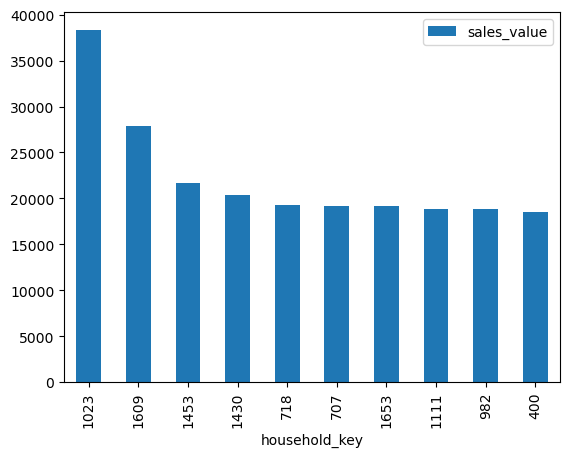

In [133]:
# Plot the total sales value for our top 10 households by value, ordered from highest to lowest.
(
    transactions
    .groupby(['household_key'])
    .agg({'sales_value':'sum'})
    .sort_values(by = 'sales_value', ascending = False)
    .reset_index()
    .head(10)
    .plot(
        kind='bar'
        ,x = 'household_key'
        ,y = 'sales_value'
    )
)

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [415]:
# Which products had the most sales by sales_value?

top_product_sales = (
    transactions
    .groupby(['product_id'])
    .agg( sales_per_product= ('sales_value','sum'))
    .sort_values(by = 'sales_per_product', ascending = False)
    .reset_index()
    .head(10)
)

top_product_sales.head()

product_id  sales_per_product
0     6534178          420154.13
1     6533889           42339.31
2     1029743           33894.75
3     1082185           24149.79
4     6533765           23831.14

<Axes: xlabel='sales_per_product', ylabel='product_id'>

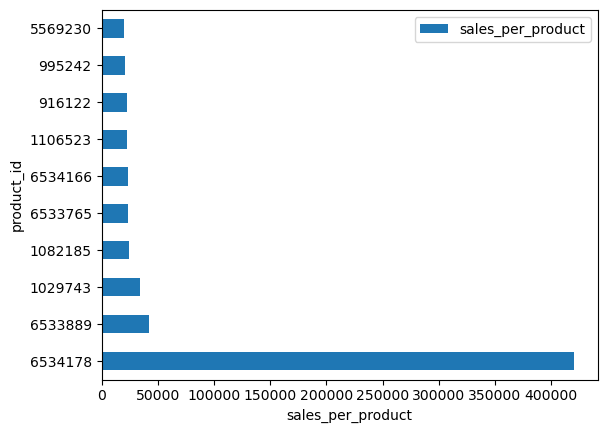

In [416]:
# Plot a horizontal bar chart
top_product_sales.head(10).plot(
    kind = 'barh'
    ,x = 'product_id'
    ,y = 'sales_per_product'
    ,xlabel = 'sales_per_product'
    ,ylabel = 'product_id'
    #,xticks = top_product_sales.product_id.unique()
    #,yticks = top_product_sales.sales_per_product.unique()
    
    )

In [417]:
# Did the top 10 selling items have a higher than average discount rate?
# top_product_sales = 
top_product_sales = (
    top_product_sales
    .assign(
        product_dicount_rate = transactions.groupby(['product_id'])['percent_discount'].transform('mean')
        ,overall_discount_rate = transactions['percent_discount'].mean()
    )
)
top_product_sales

product_id  sales_per_product  product_dicount_rate  overall_discount_rate
0     6534178          420154.13              0.276831               0.208142
1     6533889           42339.31              0.080320               0.208142
2     1029743           33894.75              0.000000               0.208142
3     1082185           24149.79              0.240130               0.208142
4     6533765           23831.14              0.188738               0.208142
5     6534166           23755.70              0.236985               0.208142
6     1106523           22931.01              0.226618               0.208142
7      916122           22749.02              0.312082               0.208142
8      995242           21229.72              0.602651               0.208142
9     5569230           20051.95              0.246602               0.208142

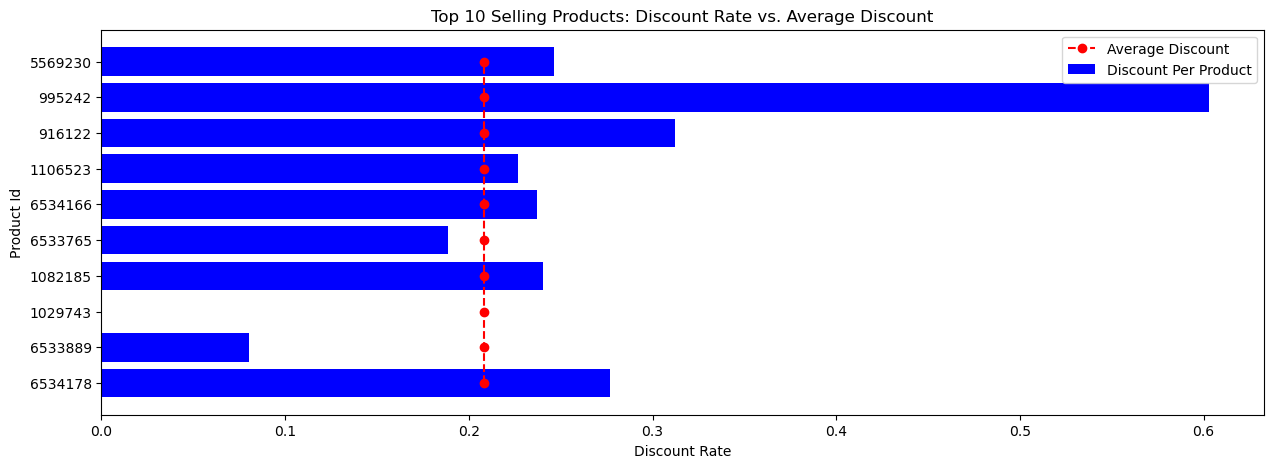

In [418]:
fig, ax1 = plt.subplots(1, figsize = (15,5))

# Plot the horizontal bar chart for discount_per_product
ax1.barh(
    top_product_sales.head(10).product_id.astype('str')
    ,top_product_sales.head(10).product_dicount_rate
    ,color = 'blue'
    ,label ='Discount Per Product'
)
ax1.plot(
    top_product_sales.head(10).overall_discount_rate
    ,top_product_sales.product_id.head(10).astype('str')
    ,color = 'red'
    ,linestyle = '--'
    ,label = 'Average Discount'
    ,marker ='o'
)
ax1.set_xlabel('Discount Rate')
ax1.set_ylabel('Product Id')
ax1.set_title('Top 10 Selling Products: Discount Rate vs. Average Discount')
ax1.legend()


In [419]:
# What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?

# First we obtain the top 10 households by sales value

top_houshold_sales = (
    transactions
    .groupby(['household_key'])
    .agg(
        sales_per_household = ('sales_value','sum')
    )
    .sort_values(by = 'sales_per_household', ascending = False)
    .reset_index()
    .loc[:10,:]
)
top_houshold_sales.head(10)

household_key  sales_per_household
0           1023             38319.79
1           1609             27859.68
2           1453             21661.29
3           1430             20352.99
4            718             19299.86
5            707             19194.42
6           1653             19153.75
7           1111             18894.72
8            982             18790.34
9            400             18494.14

In [425]:
# What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?

# Then we filter to include all products bought by the top 10 housholders.

products_by_top_householders=(
    transactions
    .loc[transactions['household_key'].isin(top_houshold_sales['household_key']),['product_id','household_key']]
)
products_by_top_householders.head()


product_id  household_key
118      830503            718
119      839605            718
120      840664            718
121      844685            718
122      848015            718

In [426]:
# then we create a column  for counting product_id by housholders and reoder to get the top 3 products bought by the top 10 householders

(
    products_by_top_householders
    .groupby(['product_id'])
    .agg( product_count =('product_id','count'))
    .reset_index()
    .sort_values(by = 'product_count', ascending = False)
    .head(10)
)

product_id  product_count
10374     6534178            659
7911      1082185            592
6355      1029743            573
10366     6533889            418
9228      1127831            256
1359       860776            209
4080       951590            204
4909       981760            180
8611      1106523            178
12018     9677202            168

In [421]:
# to view the total_product_count and product_id aside with the the householders

(
    products_by_top_householders
    .assign(
        product_count = products_by_top_householders.groupby('product_id')[['product_id']].transform('count')
    )
    .sort_values(by = 'product_count', ascending = False)
    .head(10)
    
)

product_id  household_key  product_count
1483697     6534178           1430            659
1026904     6534178           1229            659
888857      6534178           1430            659
1606712     6534178           1653            659
1835378     6534178           1430            659
1228104     6534178           1430            659
420490      6534178            982            659
1714797     6534178            718            659
419921      6534178            707            659
419799      6534178           1430            659

In [422]:
products_df = pd.read_csv("../project_data/product.csv").rename(columns = lambda x:x.lower())
products_df.head(2)

product_id  manufacturer    department     brand            commodity_desc  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   

            sub_commodity_desc curr_size_of_product  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION

In [423]:
#Look up the names of the top 10 products by sales in the products.csv dataset.(brand)
products_df.loc[products_df['product_id'].isin(top_product_sales['product_id']),:]

product_id  manufacturer       department     brand  \
16863      916122          4314             MEAT  National   
25754      995242            69          GROCERY   Private   
29657     1029743            69          GROCERY   Private   
35576     1082185             2          PRODUCE  National   
38262     1106523            69          GROCERY   Private   
53097     5569230          1208          GROCERY  National   
57171     6533765            69        KIOSK-GAS   Private   
57181     6533889            69  MISC SALES TRAN   Private   
57216     6534166            69  MISC SALES TRAN   Private   
57221     6534178            69        KIOSK-GAS   Private   

            commodity_desc              sub_commodity_desc  \
16863              CHICKEN         CHICKEN BREAST BONELESS   
25754  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
29657  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
35576       TROPICAL FRUIT                         BANANAS   
38262  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
53097          SOFT DRINKS  SOFT DRINKS 12/18&15PK CAN CAR   
57171                 FUEL           GASOLINE-REG UNLEADED   
57181    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
57216    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
57221    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   

      curr_size_of_product  
16863                       
25754                       
29657                 1 GA  
35576                40 LB  
38262                 1 GA  
53097                12 OZ  
57171                       
57181                       
57216                       
57221